In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\sk-25\Desktop\Data Analyst Portfolio\Python Project\movies.csv')

In [2]:
# Review top 5 data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Identify missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0036515388628064684%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Review data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change the data type of columns

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2107,7.8,1100000.0,1155,1778,2334,54,237000000.0,2.847246e+09,2253,162.0,31
7445,535,5,0,2019,2865,8.4,903000.0,162,743,2241,54,356000000.0,2.797501e+09,1607,181.0,41
3045,6896,5,6,1997,1225,7.8,1100000.0,1155,1778,1595,54,200000000.0,2.201647e+09,2253,194.0,19
6663,5144,5,0,2015,2609,7.8,876000.0,1125,2550,524,54,245000000.0,2.069522e+09,1541,138.0,37
7244,536,5,0,2018,2780,8.4,897000.0,162,743,2241,54,321000000.0,2.048360e+09,1607,149.0,40


In [6]:
# Create correct Year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [7]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [8]:
# Review your dataset with scroll

pd.set_option('display.max_rows', None)

In [26]:
# Drop any duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2107,7.8,1100000.0,1155,1778,2334,54,237000000.0,2.847246e+09,2253,162.0,31
7445,535,5,0,2019,2865,8.4,903000.0,162,743,2241,54,356000000.0,2.797501e+09,1607,181.0,41
3045,6896,5,6,1997,1225,7.8,1100000.0,1155,1778,1595,54,200000000.0,2.201647e+09,2253,194.0,19
6663,5144,5,0,2015,2609,7.8,876000.0,1125,2550,524,54,245000000.0,2.069522e+09,1541,138.0,37
7244,536,5,0,2018,2780,8.4,897000.0,162,743,2241,54,321000000.0,2.048360e+09,1607,149.0,40


In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


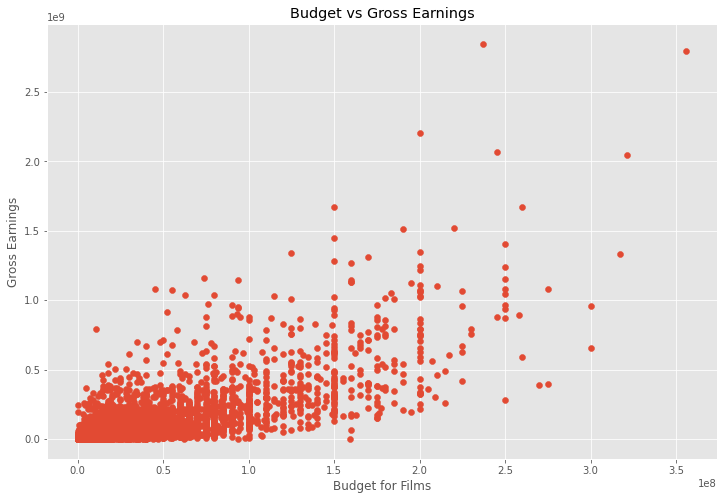

In [11]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Films')

plt.ylabel('Gross Earnings')

plt.show()

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

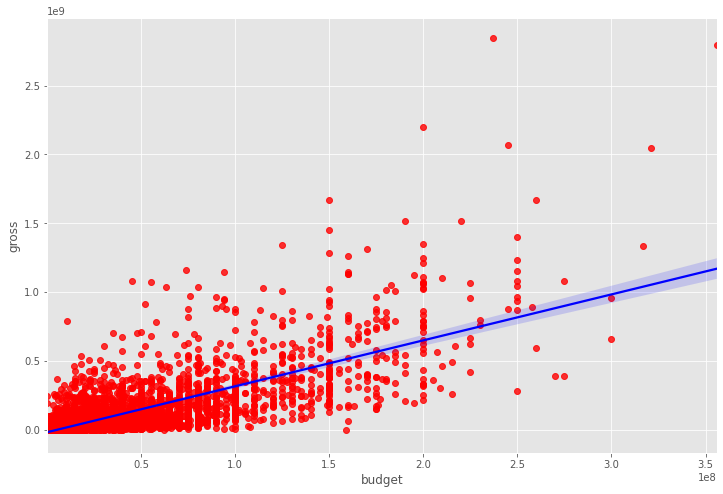

In [13]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [14]:
# Correlation

df.corr(method = 'pearson')

# pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


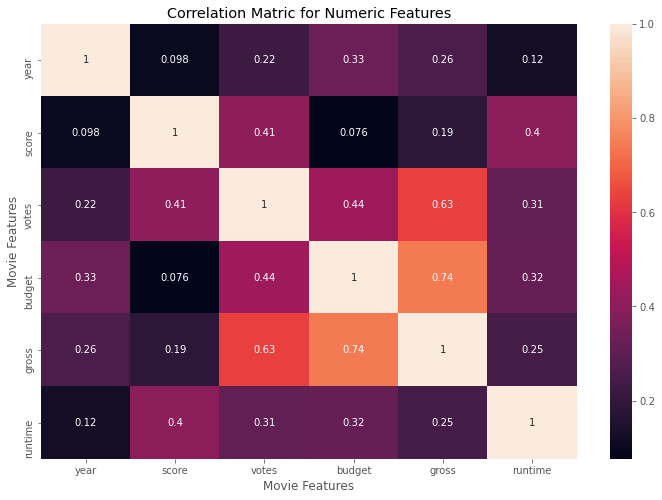

In [15]:
# High correlation between budget and gross

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [16]:
# Budget and Gross have the highest correlation

In [17]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [25]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,2107,7.8,1100000.0,1155,1778,2334,54,237000000.0,2.847246e+09,2253,162.0,31
7445,535,5,0,2019,2865,8.4,903000.0,162,743,2241,54,356000000.0,2.797501e+09,1607,181.0,41
3045,6896,5,6,1997,1225,7.8,1100000.0,1155,1778,1595,54,200000000.0,2.201647e+09,2253,194.0,19
6663,5144,5,0,2015,2609,7.8,876000.0,1125,2550,524,54,245000000.0,2.069522e+09,1541,138.0,37
7244,536,5,0,2018,2780,8.4,897000.0,162,743,2241,54,321000000.0,2.048360e+09,1607,149.0,40


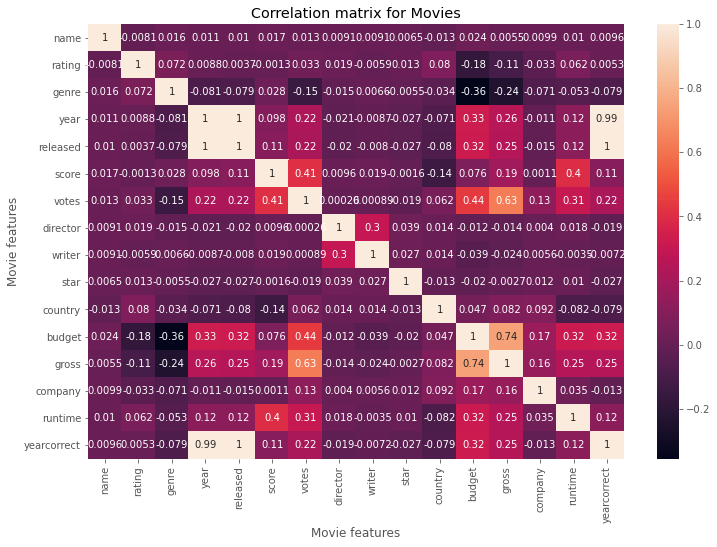

In [20]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [21]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.010397,0.017097,0.013088,0.009079,0.009081,0.006472,-0.013325,0.023970,0.005533,0.009931,0.010392,0.009638
rating,-0.008069,1.000000,0.072423,0.008779,0.003665,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.079711,-0.176002,-0.107339,-0.032599,0.062145,0.005334
genre,0.016355,0.072423,1.000000,-0.081261,-0.078549,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.034371,-0.356564,-0.235650,-0.071107,-0.052711,-0.079234
year,0.011453,0.008779,-0.081261,1.000000,0.995085,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.071126,0.329321,0.257486,-0.010778,0.120811,0.994970
released,0.010397,0.003665,-0.078549,0.995085,1.000000,0.108195,0.218409,-0.020284,-0.008021,-0.027010,-0.079897,0.323283,0.252620,-0.014697,0.123614,0.999305
score,0.017097,-0.001314,0.027965,0.097995,0.108195,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.139080,0.076254,0.186258,0.001086,0.399451,0.106860
votes,0.013088,0.033225,-0.145307,0.222945,0.218409,0.409182,1.000000,0.000260,0.000892,-0.019282,0.061536,0.442429,0.630757,0.133353,0.309212,0.218680
director,0.009079,0.019483,-0.015258,-0.020795,-0.020284,0.009559,0.000260,1.000000,0.299067,0.039234,0.013557,-0.012272,-0.014441,0.003980,0.017624,-0.019254
writer,0.009081,-0.005921,0.006567,-0.008656,-0.008021,0.019416,0.000892,0.299067,1.000000,0.027245,0.014261,-0.039451,-0.023519,0.005570,-0.003511,-0.007154
star,0.006472,0.013405,-0.005477,-0.027242,-0.027010,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.013114,-0.019589,-0.002717,0.012099,0.010174,-0.027185


In [22]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.010397
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.013325
             budget         0.023970
             gross          0.005533
             company        0.009931
             runtime        0.010392
             yearcorrect    0.009638
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.003665
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.079711
 

In [23]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.356564
genre        budget        -0.356564
             gross         -0.235650
gross        genre         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.139080
score        country       -0.139080
rating       gross         -0.107339
gross        rating        -0.107339
country      runtime       -0.082178
runtime      country       -0.082178
genre        year          -0.081261
year         genre         -0.081261
released     country       -0.079897
country      released      -0.079897
yearcorrect  country       -0.079326
country      yearcorrect   -0.079326
yearcorrect  genre         -0.079234
genre        yearcorrect   -0.079234
released     genre         -0.078549
genre        released      -0.078549
year         country       -0.071126
country      year          -0.071126
company      genre         -0.071107
g

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.630757
votes        gross          0.630757
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.994970
yearcorrect  year           0.994970
released     year           0.995085
year         released       0.995085
released     yearcorrect    0.999305
yearcorrect  released       0.999305
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation